# Bikes

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

In [2]:
RANDOM_SEED = 4579
np.random.seed(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
with pm.Model() as model_bikes:
    α = pm.Exponential("α", 1 / 10)
    μ = pmb.BART("μ", X, Y, m=50)
    y = pm.NegativeBinomial("y", mu=np.abs(μ), alpha=α, observed=Y)
    idata_bikes = pm.sample(tune=2000, draws=2000, chains=4, random_seed=RANDOM_SEED)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 260 seconds.


In [5]:
idata_bikes

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [6]:
az.summary(idata_bikes)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],15.751,23.328,-31.376,47.167,10.679,8.068,6.0,23.0,1.72
μ[1],0.190,8.537,-14.024,17.843,1.993,1.432,18.0,42.0,1.17
μ[2],157.541,32.377,101.791,223.134,7.975,5.742,17.0,193.0,1.19
μ[3],138.482,28.331,87.173,188.498,2.757,1.955,100.0,578.0,1.04
μ[4],121.382,35.934,54.740,188.509,4.646,3.302,57.0,175.0,1.07
...,...,...,...,...,...,...,...,...,...
μ[344],167.113,29.312,114.871,220.965,6.041,4.326,24.0,113.0,1.13
μ[345],116.639,44.691,28.352,194.756,13.321,9.675,11.0,70.0,1.28
μ[346],196.821,38.431,126.720,272.296,10.658,8.002,14.0,36.0,1.21
μ[347],198.520,31.583,141.177,259.580,6.847,4.910,20.0,168.0,1.16


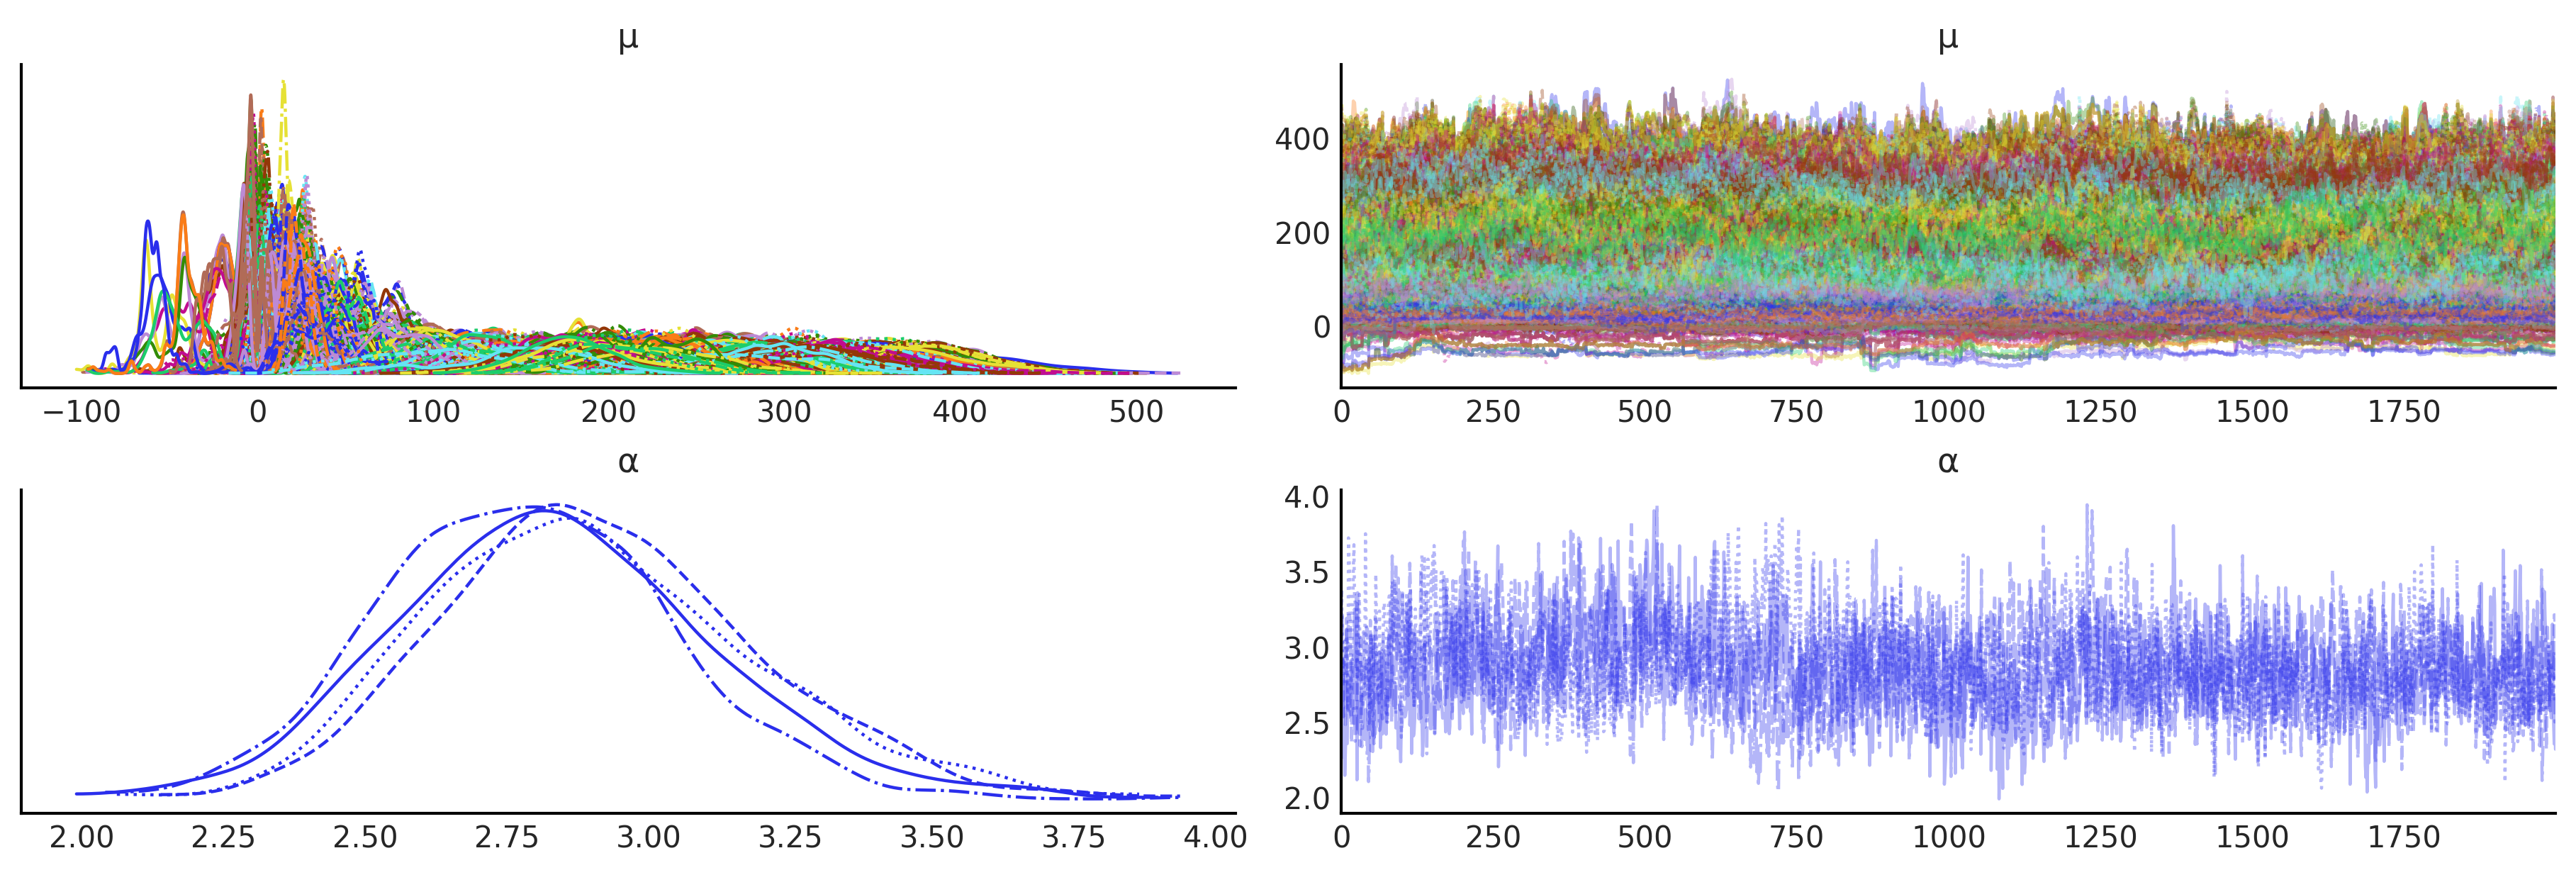

In [7]:
az.plot_trace(idata_bikes)
plt.savefig("trace_bikes.png", bbox_inches="tight");

### Partial dependence plots

/home/pablo/anaconda3/envs/bart-experiments/lib/python3.9/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


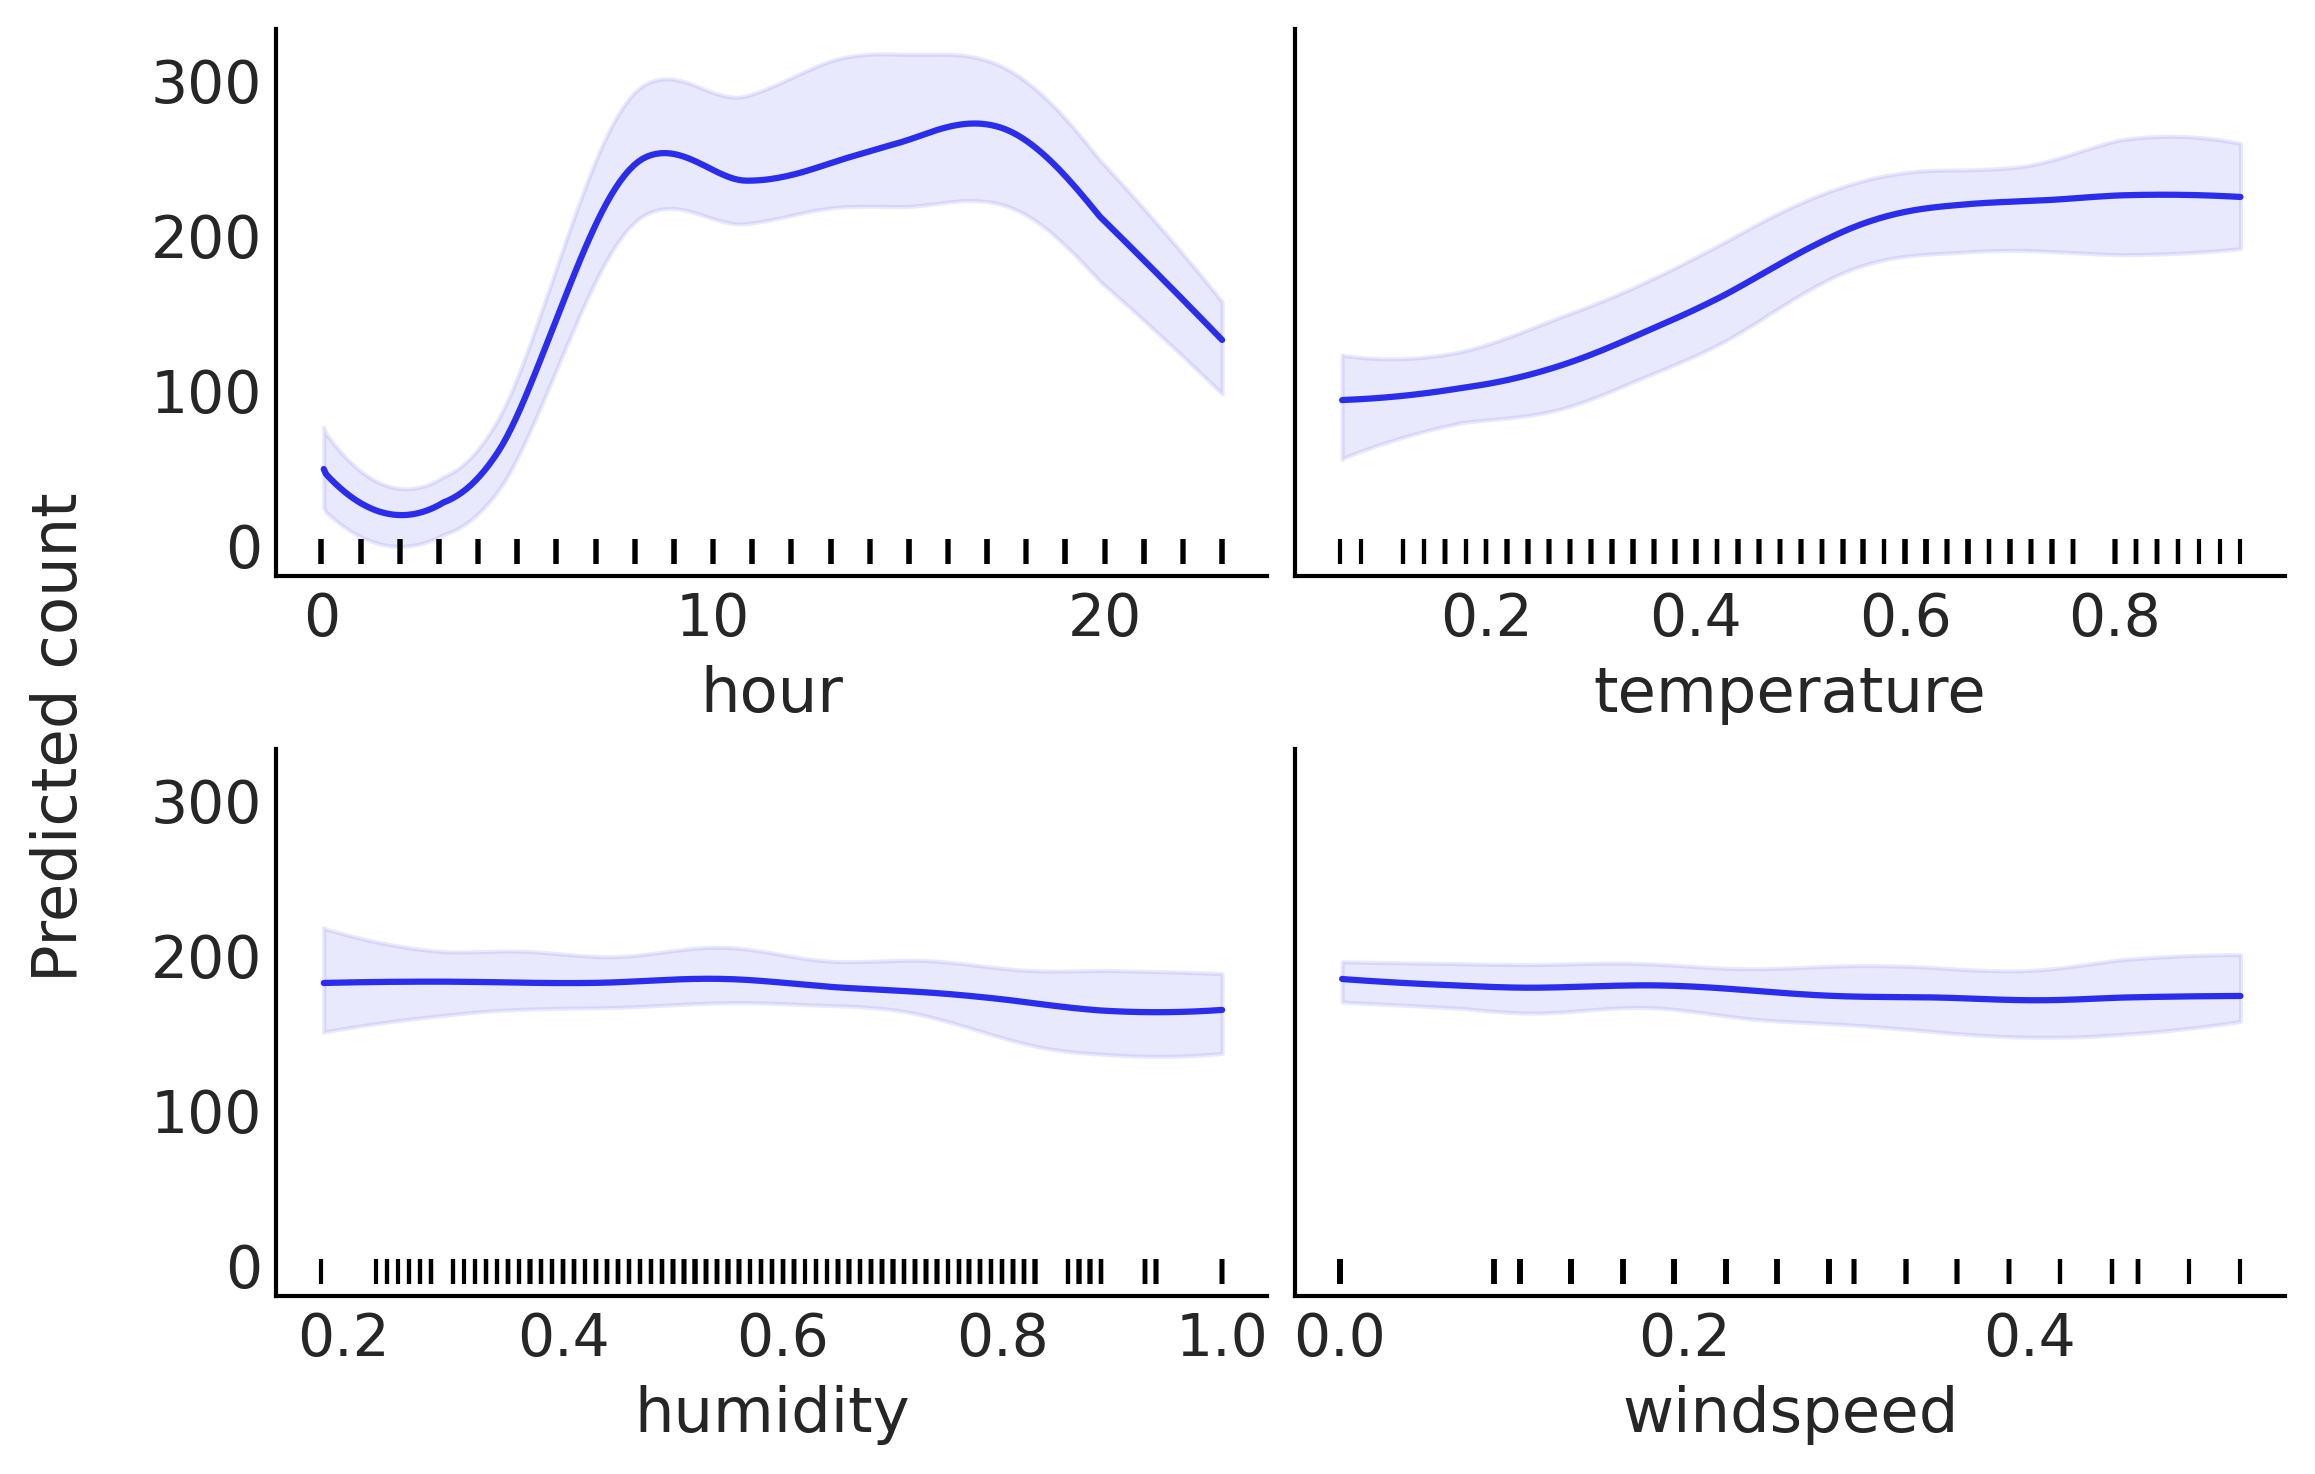

In [8]:
pmb.plot_dependence(μ, X=X, Y=Y, grid=(2, 2))
plt.savefig("partial_dependence_plot_bikes.png", bbox_inches="tight");

### Variable importance

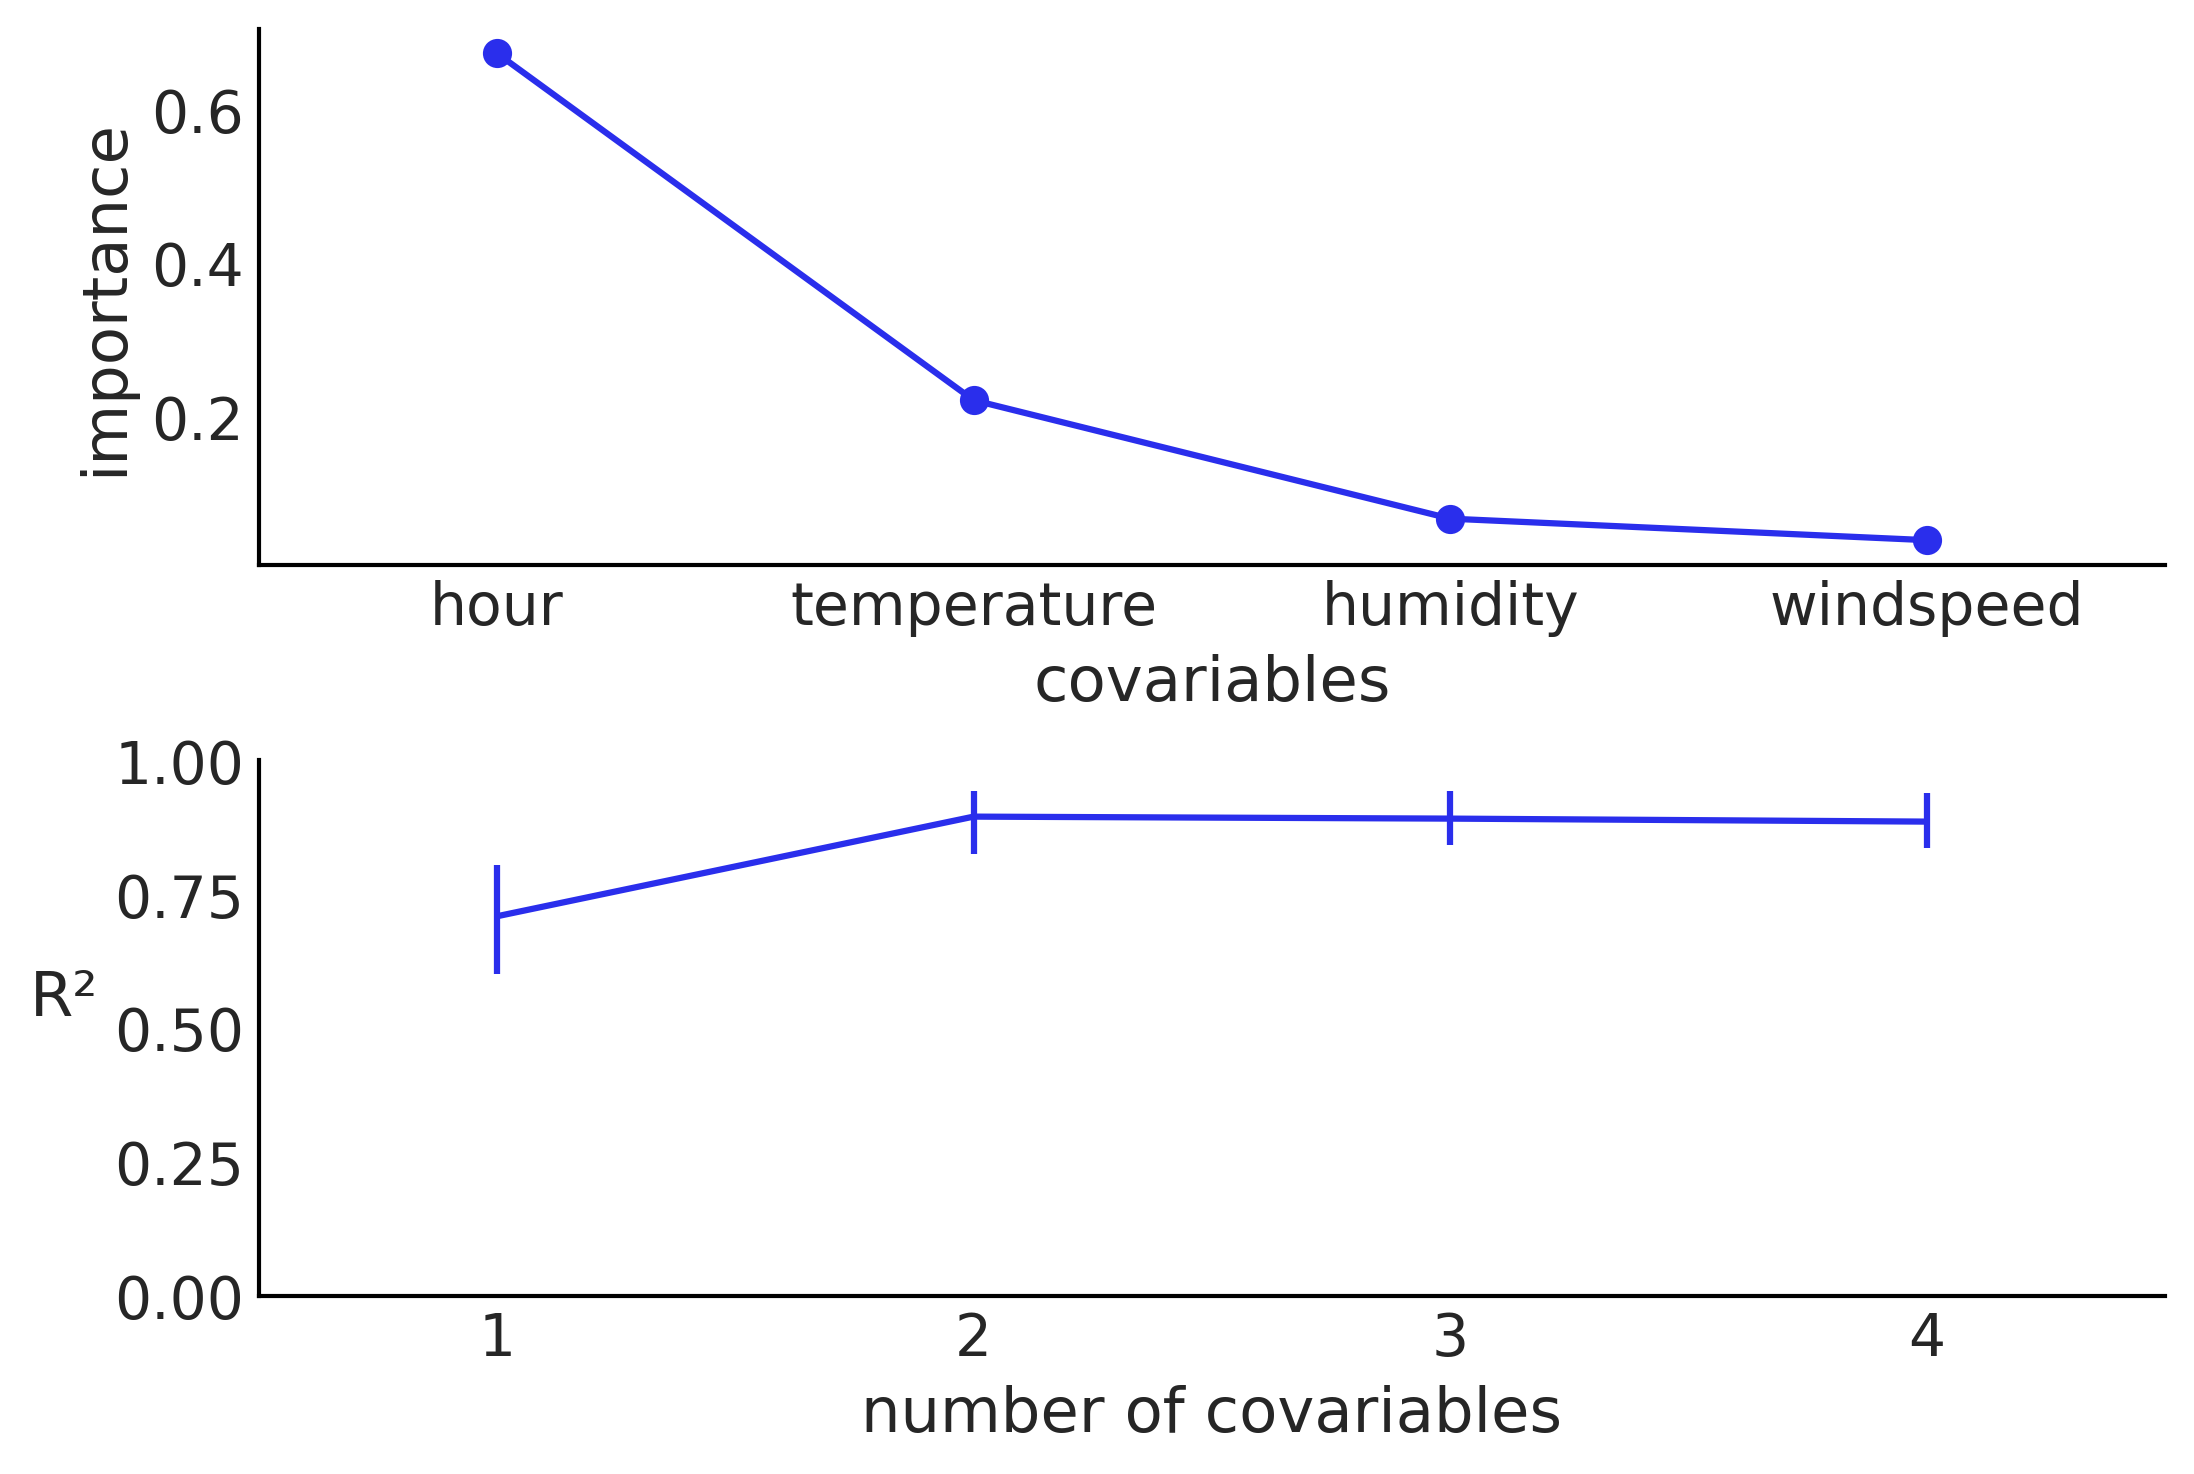

In [9]:
labels = ["hour", "temperature", "humidity", "windspeed"]
pmb.utils.plot_variable_importance(idata_bikes, μ, X.values, labels, samples=100)
plt.savefig("bikes_VI-correlation.png");